# Detect lines

266


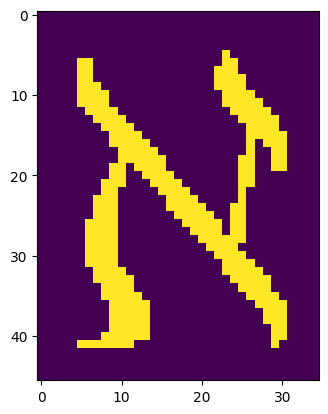

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv.imread(cv.samples.findFile("../latex_data/latex_data.png"), cv.IMREAD_GRAYSCALE)

def detect_chars(img):
    thresh, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    num_labels, labels = cv.connectedComponents(img)
    groups = [labels == i for i in range(1, num_labels)]
    return groups

def show_images(img):
    images = detect_chars(img)
    n = len(images)
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    # Total rows: 1 (top row) + rows (for the grid)
    fig, axes = plt.subplots(rows + 1, cols, figsize=(cols * 3, (rows + 1) * 3))

    # If axes is 1D, make sure it's 2D for consistency
    if rows + 1 == 1:
        axes = np.array([[axes]])
    elif isinstance(axes[0], plt.Axes):
        axes = np.expand_dims(axes, axis=0)

    # --- Top Row ---
    for i in range(cols):
        if i == cols // 2:
            axes[0, i].imshow(~img, cmap='gray')
        axes[0, i].axis('off')  # Hide all, only one will show

    # --- Grid Below ---
    axes_flat = axes[1:].flatten()
    for i, img in enumerate(images):
        axes_flat[i].imshow(img, cmap='gray')
        axes_flat[i].axis('off')

    # Hide any extras
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].axis('off')

# show_images(img)
images = detect_chars(img)
print(len(images))
margin = 5
for i, img in enumerate(images):
    pixels = np.nonzero(img)
    top, bottom, left, right = min(pixels[0]), max(pixels[0]), min(pixels[1]), max(pixels[1])
    images[i] = img[top-margin:bottom+margin, left-margin:right+margin]
plt.imshow(images[254])